In [8]:
import sys
sys.path.append(".../src")

%load_ext autoreload
%autoreload 2

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
from skimage import io
from scipy.fft import fft2, ifft2, fftshift, ifftshift


Text(0.5, 1.0, 'Noised Namib image')

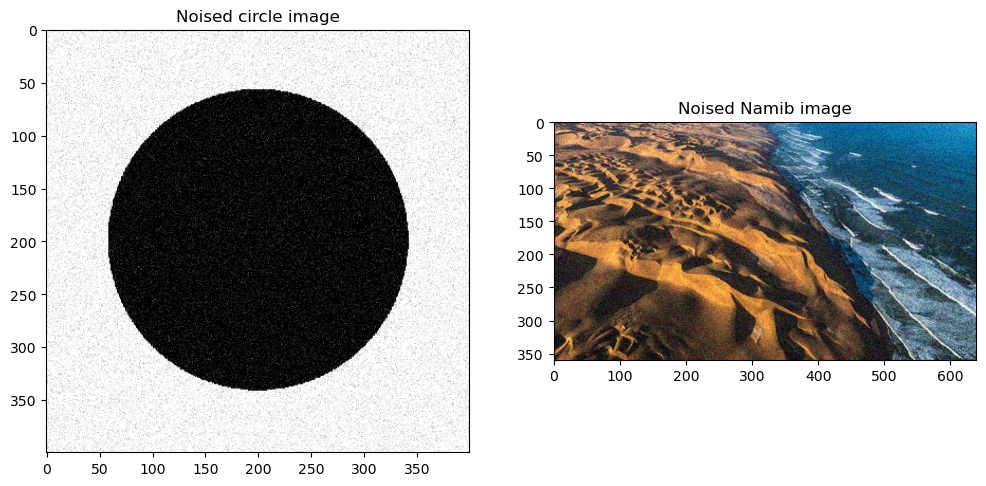

In [112]:
noised_namib = io.imread("namib-noised.png")
noised_circle = io.imread("circle-noised.png")

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(noised_circle, cmap='gray')
plt.title("Noised circle image")
plt.subplot(1,2,2)
plt.imshow(noised_namib)
plt.title("Noised Namib image")


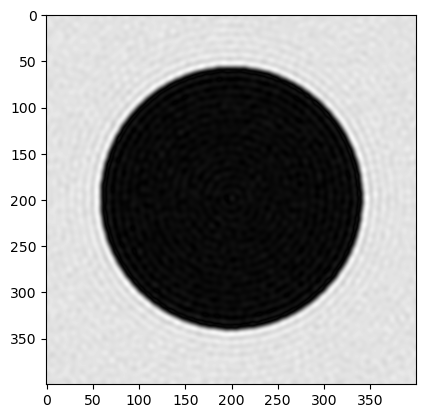

In [116]:
img_to_freq = fft2(noised_circle)
shift_const_to_center = fftshift(img_to_freq)

# Creating a low-pass filter 
rows, cols = noised_circle.shape
crow, ccol = rows//2, cols//2
radius = 45
mask = np.zeros((rows, cols), dtype=np.uint8)

y, x = np.ogrid[:rows, :cols]
distance_from_center = np.sqrt((x - ccol)**2 + (y - crow)**2)
mask[distance_from_center <= radius] = 1

# Apply the mask to the FFT result
shifted_freq_filtered = shift_const_to_center * mask

# Perform inverse FFT
freq_shift_back_to_ori_pos = ifftshift(shifted_freq_filtered)
freq_to_img = ifft2(freq_shift_back_to_ori_pos)
denoised_image = np.abs(freq_to_img)

plt.imshow(denoised_image, cmap='gray')


Text(0.5, 1.0, 'Denoised Image')

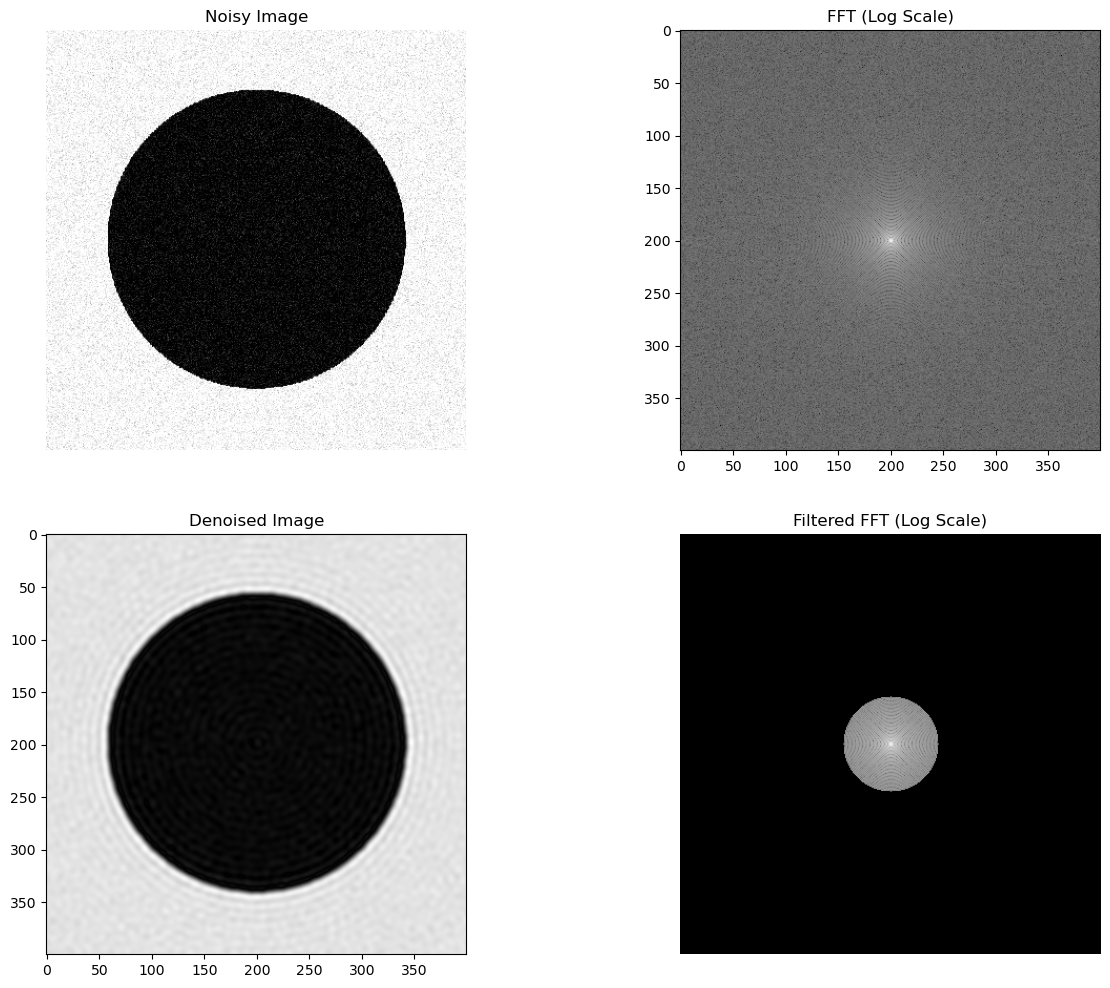

In [119]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.imshow(noised_circle, cmap='gray')
plt.axis('off')
plt.title("Noisy Image")

img_to_freq = fft2(noised_circle)
shift_const_to_center = fftshift(img_to_freq)

F = np.log(np.abs(shift_const_to_center) + 1)
plt.subplot(2, 2, 2)
plt.imshow(F, cmap='gray')
plt.title("FFT (Log Scale)")

# Creating a low-pass filter 
rows, cols = noised_circle.shape
crow, ccol = rows//2, cols//2
radius = 45
mask = np.zeros((rows, cols), dtype=np.uint8)

y, x = np.ogrid[:rows, :cols]
distance_from_center = np.sqrt((x - ccol)**2 + (y - crow)**2)
mask[distance_from_center <= radius] = 1

# Apply the mask to the FFT result
shifted_freq_filtered = shift_const_to_center * mask

F_filtered = np.log(np.abs(shifted_freq_filtered) + 1)
plt.subplot(2, 2, 4)
plt.imshow(F_filtered, cmap='gray')
plt.axis('off')
plt.title("Filtered FFT (Log Scale)")

# Perform inverse FFT
freq_shift_back_to_ori_pos = ifftshift(shifted_freq_filtered)
freq_to_img = ifft2(freq_shift_back_to_ori_pos)
denoised_image = np.abs(freq_to_img)

# Display the denoised image
plt.subplot(2, 2, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")


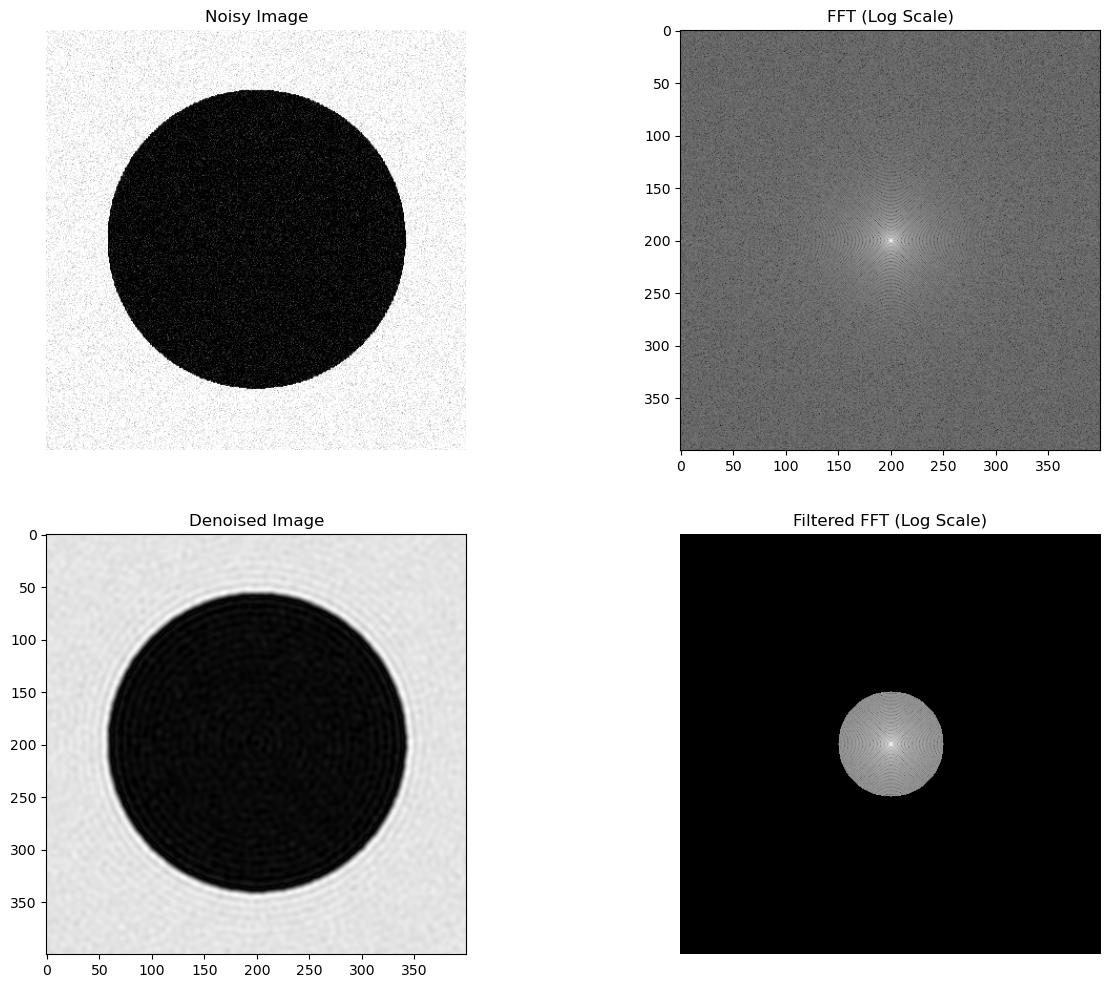

In [120]:
def denoise_image(image, filter_size):
    plt.figure(figsize=(15, 12))
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title("Noisy Image")

    img_to_freq = fft2(image)
    shift_const_to_center = fftshift(img_to_freq)

    F = np.log(np.abs(shift_const_to_center) + 1)
    plt.subplot(2, 2, 2)
    plt.imshow(F, cmap='gray')
    plt.title("FFT (Log Scale)")

    # Creating a low-pass filter 
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    radius = filter_size
    mask = np.zeros((rows, cols), dtype=np.uint8)

    y, x = np.ogrid[:rows, :cols]
    distance_from_center = np.sqrt((x - ccol)**2 + (y - crow)**2)
    mask[distance_from_center <= radius] = 1

    # Apply the mask to the FFT result
    shifted_freq_filtered = shift_const_to_center * mask

    F_filtered = np.log(np.abs(shifted_freq_filtered) + 1)
    plt.subplot(2, 2, 4)
    plt.imshow(F_filtered, cmap='gray')
    plt.axis('off')
    plt.title("Filtered FFT (Log Scale)")

    # Perform inverse FFT
    freq_shift_back_to_ori_pos = ifftshift(shifted_freq_filtered)
    freq_to_img = ifft2(freq_shift_back_to_ori_pos)
    denoised_image = np.abs(freq_to_img)

    # Display the denoised image
    plt.subplot(2, 2, 3)
    plt.imshow(denoised_image, cmap='gray')
    plt.title("Denoised Image")
    
denoise_image(noised_circle, 50)


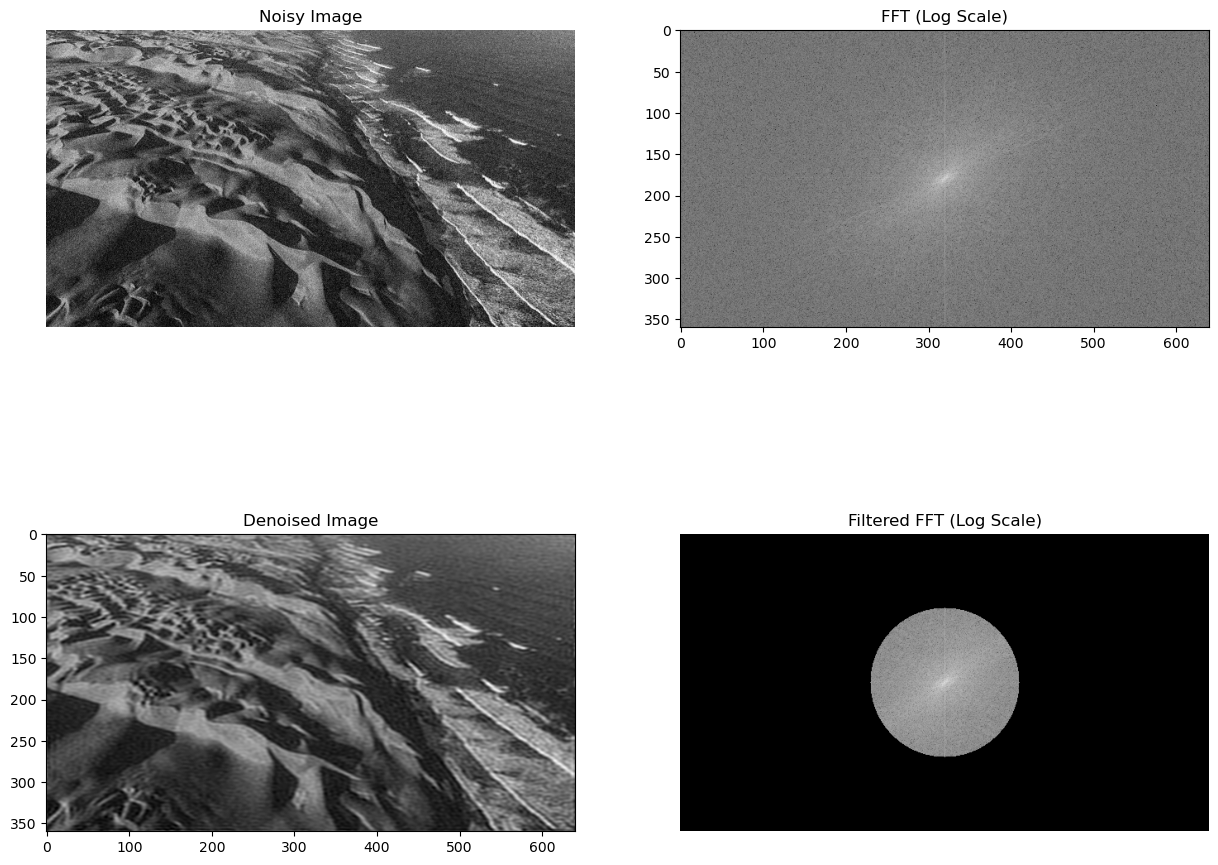

In [125]:
namib = np.mean(noised_namib, -1)
denoise_image(namib, 90)

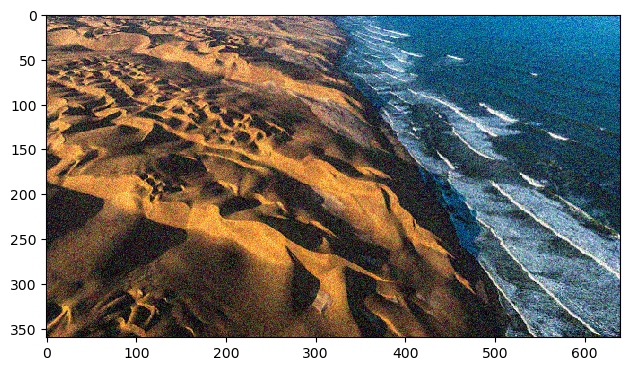

In [129]:
noised_namib = io.imread("namib-noised.png")
io.imshow(noised_namib)

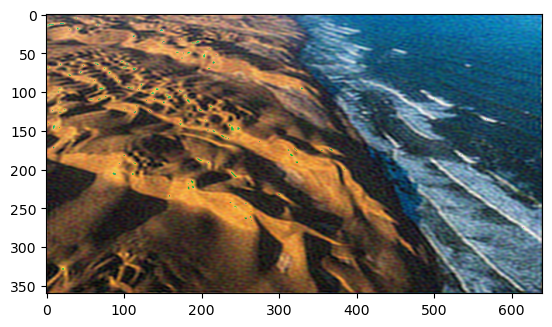

In [150]:
def denoise_rgb_image(image, filter_size):
    
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("The input image must be a 3-channel RGB image.")

    denoised_image = np.zeros_like(image)

    for i in range(3):
        channel = image[:, :, i]

        img_to_freq = fft2(channel)
        shift_const_to_center = fftshift(img_to_freq)

        rows, cols = channel.shape
        crow, ccol = rows // 2, cols // 2
        radius = filter_size
        mask = np.zeros((rows, cols), dtype=np.uint8)

        y, x = np.ogrid[:rows, :cols]
        distance_from_center = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)
        mask[distance_from_center <= radius] = 1

        shifted_freq_filtered = shift_const_to_center * mask

        freq_shift_back_to_ori_pos = ifftshift(shifted_freq_filtered)
        freq_to_img = ifft2(freq_shift_back_to_ori_pos)
        denoised_channel = np.abs(freq_to_img)

        
        denoised_image[:, :, i] = denoised_channel
        
    return denoised_image
image = denoise_rgb_image(noised_namib, 90)
plt.imshow(image)
